In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
dataset_path = '/content/drive/My Drive/CVPR DATA/Assignment 1/Animals'
try:
    print("Folders found in dataset path:", os.listdir(dataset_path))
except FileNotFoundError:
    print("The specified path does not exist. Please check the path.")



Folders found in dataset path: ['Jaguar', 'Leopard', 'Cheetah', 'Lion', 'Tiger']


In [29]:
def load_dataset(dataset_path):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_path, class_name)
        for file in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img, (128, 128))
            images.append(img_resized.flatten())
            labels.append(label)

    return np.array(images), np.array(labels), class_names

images, labels, class_names = load_dataset(dataset_path)
print(f"Loaded {len(images)} images across {len(class_names)} classes.")



Loaded 170 images across 5 classes.


In [7]:
len(images)

170

(170, 65536)


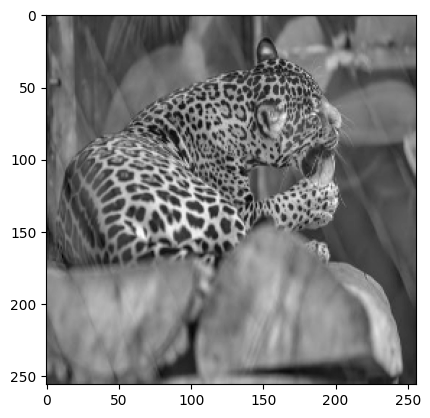

In [28]:
print(images.shape)
image_to_display = images[0].reshape(128,128)
plt.imshow(image_to_display, cmap='gray')

In [30]:
import random
random.shuffle(images)

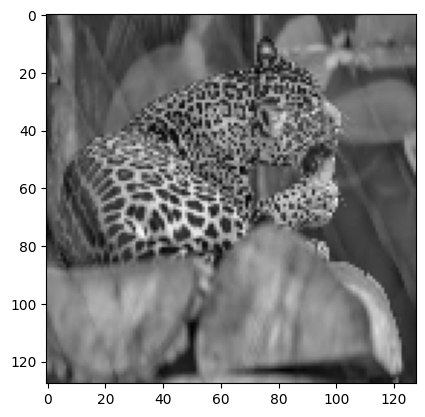

In [31]:
image_to_display = images[0].reshape(128, 128)

plt.imshow(image_to_display, cmap='gray')

In [32]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [33]:
def k_nearest_neighbors(train_data, train_labels, test_data, k):
    predictions = []
    for test_point in test_data:
        distances = [euclidean_distance(test_point, x) for x in train_data]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [train_labels[i] for i in k_indices]
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(predicted_label)
    return predictions


In [59]:
def cross_validate_knn(data, labels, k_values, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracy_results = {k: [] for k in k_values}
    fold_accuracies = []

    for train_index, test_index in kf.split(data):
        train_data, test_data = data[train_index], data[test_index]
        train_labels, test_labels = labels[train_index], labels[test_index]

        for k in k_values:
            predictions = k_nearest_neighbors(train_data, train_labels, test_data, k)
            accuracy = accuracy_score(test_labels, predictions)
            accuracy_results[k].append(accuracy)
            fold_accuracies.append(accuracy)

    return accuracy_results, fold_accuracies




In [60]:
k_values = range(1, 31)
results, fold_accuracies = cross_validate_knn(images, labels, k_values)

average_accuracies = {k: np.mean(results[k]) for k in k_values}

average_accuracies = {k: round(acc, 2) for k, acc in average_accuracies.items()}
for k, accuracy in average_accuracies.items():
    print(f"Average accuracy for k={k}: {accuracy}")


Average accuracy for k=1: 0.28
Average accuracy for k=2: 0.31
Average accuracy for k=3: 0.3
Average accuracy for k=4: 0.29
Average accuracy for k=5: 0.27
Average accuracy for k=6: 0.23
Average accuracy for k=7: 0.23
Average accuracy for k=8: 0.19
Average accuracy for k=9: 0.24
Average accuracy for k=10: 0.2
Average accuracy for k=11: 0.22
Average accuracy for k=12: 0.23
Average accuracy for k=13: 0.22
Average accuracy for k=14: 0.21
Average accuracy for k=15: 0.19
Average accuracy for k=16: 0.21
Average accuracy for k=17: 0.21
Average accuracy for k=18: 0.24
Average accuracy for k=19: 0.22
Average accuracy for k=20: 0.22
Average accuracy for k=21: 0.23
Average accuracy for k=22: 0.24
Average accuracy for k=23: 0.25
Average accuracy for k=24: 0.27
Average accuracy for k=25: 0.27
Average accuracy for k=26: 0.25
Average accuracy for k=27: 0.23
Average accuracy for k=28: 0.22
Average accuracy for k=29: 0.23
Average accuracy for k=30: 0.24


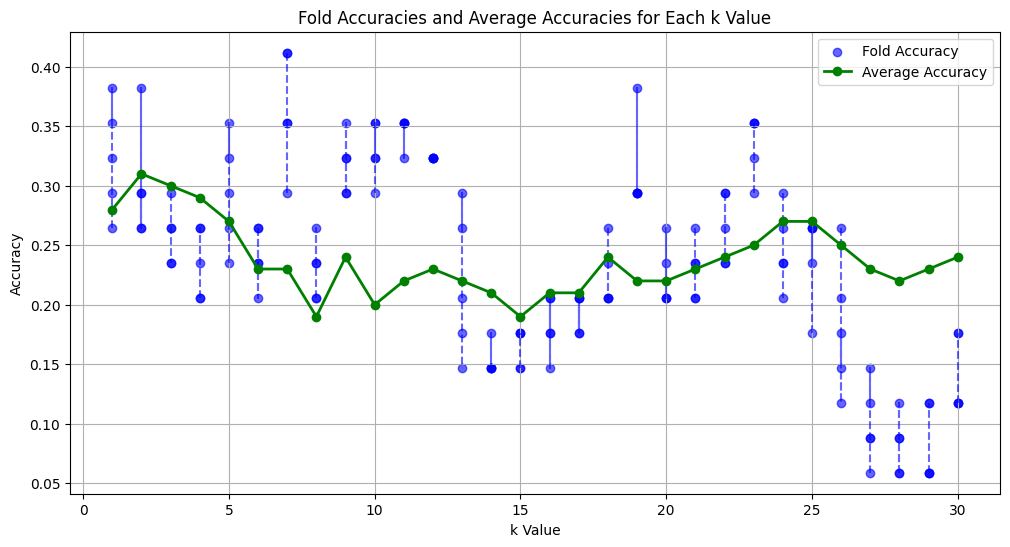

In [62]:

folds_per_k = 5
plt.figure(figsize=(12, 6))

for k in k_values:
    start = (k - 1) * folds_per_k
    end = start + folds_per_k

    k_fold_accuracies = fold_accuracies[start:end]

    plt.scatter([k] * folds_per_k, k_fold_accuracies, color='blue', alpha=0.6, label='Fold Accuracy' if k == 1 else "")

    plt.plot([k] * folds_per_k, k_fold_accuracies, color='blue', linestyle='--', alpha=0.6)

plt.plot(k_values, list(average_accuracies.values()), color='green', marker='o', label='Average Accuracy', linewidth=2)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Fold Accuracies and Average Accuracies for Each k Value')
plt.legend()
plt.grid(True)
plt.show()
